# Homework 3

## 1) Preprocess Dataset

In [1]:
# import needed libraries
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, make_scorer
import seaborn as sns

In [2]:
# load dataset
df = pd.read_csv("rent.csv")

In [3]:
# check for missing values
df.isnull().sum()

bathrooms         0
bedrooms          0
price             0
longitude         0
latitude          0
interest_level    0
dtype: int64

In [4]:
df

,bathrooms,bedrooms,price,longitude,latitude,interest_level
0,1.5,3,3000,-73.9425,40.7145,2
1,1.0,2,5465,-73.9667,40.7947,1
2,1.0,1,2850,-74.0018,40.7388,3
3,1.0,1,3275,-73.9677,40.7539,1
4,1.0,4,3350,-73.9493,40.8241,1
...,...,...,...,...,...,...
49347,1.0,2,3200,-73.9790,40.7426,2
49348,1.0,1,3950,-74.0163,40.7102,1
49349,1.0,1,2595,-73.9900,40.7601,1
49350,1.0,0,3350,-74.0101,40.7066,1


In [5]:
df.describe()

,bathrooms,bedrooms,price,longitude,latitude,interest_level
count,49352.00000,49352.000000,4.935200e+04,49352.000000,49352.000000,49352.000000
mean,1.21218,1.541640,3.830174e+03,-73.955716,40.741545,1.383105
std,0.50142,1.115018,2.206687e+04,1.177912,0.638535,0.626035
min,0.00000,0.000000,4.300000e+01,-118.271000,0.000000,1.000000
25%,1.00000,1.000000,2.500000e+03,-73.991700,40.728300,1.000000
50%,1.00000,1.000000,3.150000e+03,-73.977900,40.751800,1.000000
75%,1.00000,2.000000,4.100000e+03,-73.954800,40.774300,2.000000
max,10.00000,8.000000,4.490000e+06,0.000000,44.883500,3.000000


## 2) Data Exploration

In [6]:
# separate input from output variables
X = df.drop(columns=['price'])
y = df['price']

df

,bathrooms,bedrooms,price,longitude,latitude,interest_level
0,1.5,3,3000,-73.9425,40.7145,2
1,1.0,2,5465,-73.9667,40.7947,1
2,1.0,1,2850,-74.0018,40.7388,3
3,1.0,1,3275,-73.9677,40.7539,1
4,1.0,4,3350,-73.9493,40.8241,1
...,...,...,...,...,...,...
49347,1.0,2,3200,-73.9790,40.7426,2
49348,1.0,1,3950,-74.0163,40.7102,1
49349,1.0,1,2595,-73.9900,40.7601,1
49350,1.0,0,3350,-74.0101,40.7066,1


## 3) Question 5

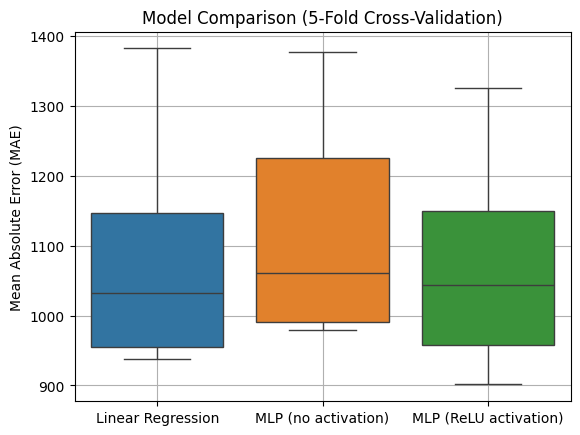

Linear Regression - Mean MAE: 1090.8010, Median MAE: 1032.3305
MLP (no activation) - Mean MAE: 1126.5135, Median MAE: 1060.1782
MLP (ReLU activation) - Mean MAE: 1075.4616, Median MAE: 1043.2832


In [7]:
# use 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# define models
models = {
    "Linear Regression": LinearRegression(),
    "MLP (no activation)": MLPRegressor(
        hidden_layer_sizes=(5, 5),
        activation='identity',
        max_iter=5000,
        random_state=42
    ),
    "MLP (ReLU activation)": MLPRegressor(
        hidden_layer_sizes=(5, 5),
        activation='relu',
        max_iter=5000,
        random_state=42
    )
}

# evaluate models
results = {}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=cv, scoring="neg_mean_absolute_error")
    # convert negative MAE values to positive
    results[name] = -scores

final_results = pd.DataFrame(results)
sns.boxplot(data=final_results)
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Model Comparison (5-Fold Cross-Validation)")
plt.grid(True)
plt.show()

mean_mae = final_results.mean()
median_mae = final_results.median()

for model in models.keys():
    print(f"{model} - Mean MAE: {mean_mae[model]:.4f}, Median MAE: {median_mae[model]:.4f}")

## 4) Question 6

A Linear Regression model predicts a continuous target variable, *y*, from inputs, X, by fitting a linear relationship. It is based on the assumption that the underlying relationship between the inputs and the output is linear. This model is valued for its speed in training and ease of interpretation.
In contrast, a Multi-Layer Perceptron (MLP) Regressor with ReLU (Rectified Linear Unit) activation is a type of neural network that can learn both linear and non-linear relationships between inputs and outputs. It consists of multiple layers of neurons, where each neuron applies a weighted sum of its inputs followed by a non-linear activation function (ReLU, in this case). This non-linearity allows the network to capture complex patterns in the data. However, MLPs are typically slower to train, require more data, and are more difficult to interpret than Linear Regression models.

An MLP Regressor without an activation function (i.e., with identity activation) behaves similarly to a Linear Regression model because each hidden layer performs only a linear transformation. Stacking multiple linear layers effectively collapses into a single linear transformation, meaning that such a model cannot capture non-linear relationships. By contrast, when an activation function like ReLU is used, the network introduces non-linearity, enabling it to represent complex, non-linear dependencies between features and the target variable.
Thus, the main impact of activation functions is to expand the model’s capacity to fit non-linear patterns in the data. Without them, a MLP behaves like a simple linear model; with them, it becomes far more expressive. In practice, using an activation function (e.g., ReLU) usually leads to better performance on datasets where relationships are not purely linear.

Analyzing the boxplots obtained earlier (question 5), we can observe that the Linear Regression model achieved the lowest MAE among the three models. This suggests that, for this particular dataset, a linear model fits the data well and generalizes effectively across folds. The MLP with ReLU activation has a slightly higher MAE but still performs comparably, indicating that introducing non-linearity did not drastically improve performance—likely because the data’s underlying relationships are not strongly non-linear. The MLP without an activation function performs worst, with the highest MAE and greater variability, confirming that it fails to capture relevant patterns in the data. 
Looking at the whiskers, the Linear Regression model appears fairly stable, with a short lower whisker but a somewhat longer upper whisker, indicating occasional higher errors in some folds. The MLP with ReLU activation shows more variation in lower MAE values (longer lower whisker), suggesting that some folds performed even better than Linear Regression, but with fewer extreme errors overall (shorter upper whisker).

## 5) Question 7

In [ ]:
# model = nn.Sequential(
#     nn.Linear(input_size, hidden_size),
#     nn.ReLU(),
#     nn.Linear(hidden_size, output_size)
# )

model = MLPRegressor(
    hidden_layer_sizes=(5, 5),
    activation='relu',
    max_iter=5000,
    random_state=42
)